In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.style.use('science')

In [2]:
with h5py.File('output.h5') as file:
    rho   = np.array(file['density'])
    vel_x = np.array(file['vel_x'])
    vel_y = np.array(file['vel_y'])
    vel   = np.dstack([vel_x, vel_y])


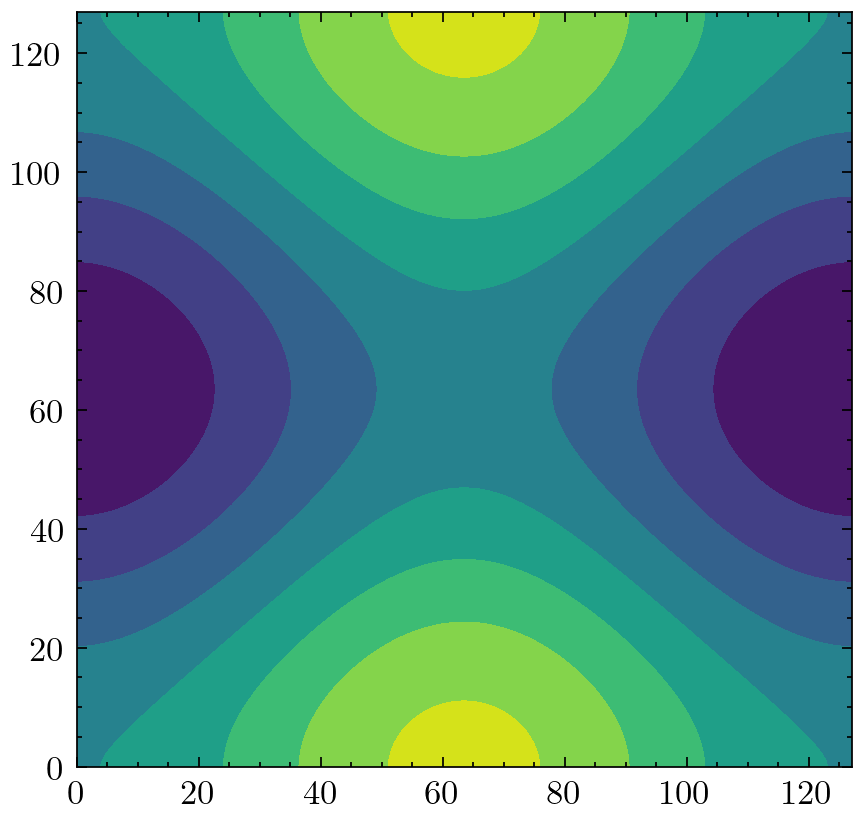

In [31]:
figsize = plt.figaspect(1)
fig, ax = plt.subplots(dpi=250, figsize=figsize)
view = ax.contourf(rho[-1, ...])
# view = ax.contourf(np.sqrt(energy))
ax.set(adjustable="datalim")
# ax.axis('equal')
plt.show()


<IPython.core.display.Javascript object>


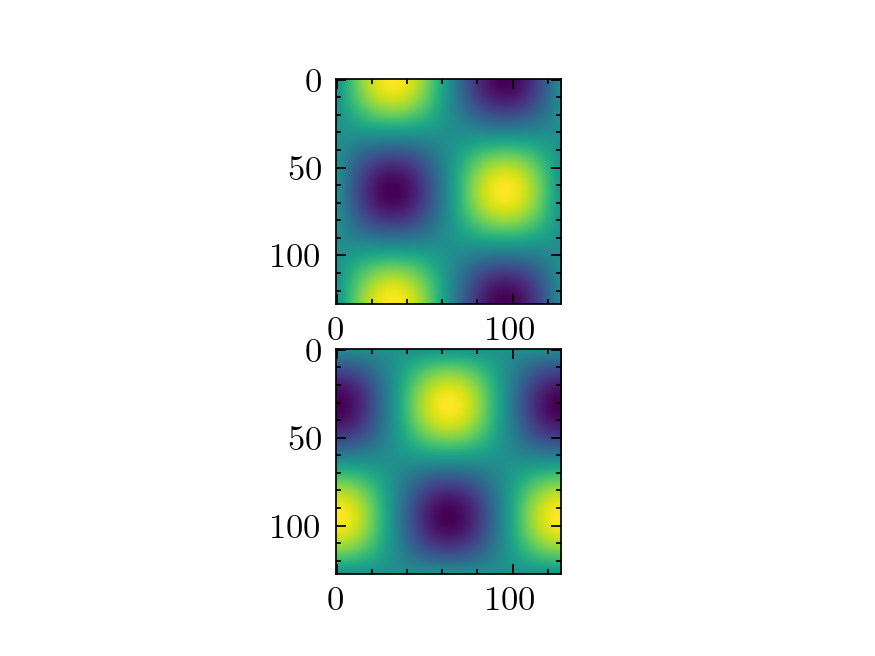

interactive(children=(FloatSlider(value=0.0, description='w', step=1.0), Output()), _dom_classes=('widget-inte…

In [57]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

iters = rho.shape[0] - 1

vmax, vmin = np.max(vel_x), np.min(vel_x)

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=250)
ax1.imshow(vel_x[0, ...], vmax=vmax, vmin=vmin)
ax2.imshow(vel_y[0, ...], vmax=vmax, vmin=vmin)

def update(w=0): 
    ax1.clear()
    ax2.clear()
    ax1.imshow(vel_x[int(w), ...], vmax=vmax, vmin=vmin)
    ax2.imshow(vel_y[int(w), ...], vmax=vmax, vmin=vmin)
    plt.show()

interact(update, w=widgets.FloatSlider(value=0, min=0, max=iters, step=1));

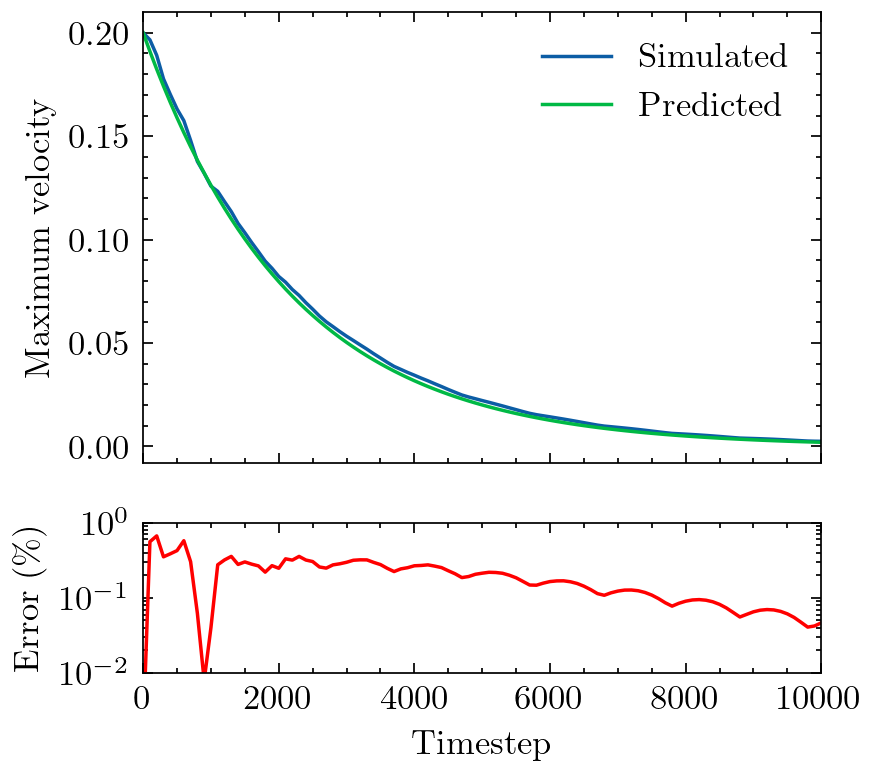

In [8]:
%matplotlib inline

vel_norm  = np.sqrt(vel_x**2 + vel_y**2)
max_vel   = np.max(vel_norm, axis=(1, 2))
timesteps = 100*np.arange(0, iters+1)
predicted = 0.2*np.exp(-2*2.3E-04*timesteps)
error     = np.abs(max_vel - predicted)

fig, (axData, axErr) = plt.subplots(2, 1, sharex=True, dpi=250, gridspec_kw={'height_ratios': [3, 1]}, figsize=(3.5, 3.5))
axData.plot(timesteps, max_vel, label='Simulated')
axData.plot(timesteps, predicted, label='Predicted')
axData.legend();
axData.set_ylabel('Maximum velocity');
axErr.semilogy(timesteps, error*100, 'r');
axErr.set_xlim(0, 100*iters);
axErr.set_ylim(1E-02, 1);
axErr.set_xlabel('Timestep');
axErr.set_ylabel('Error (\%)');

<IPython.core.display.Javascript object>


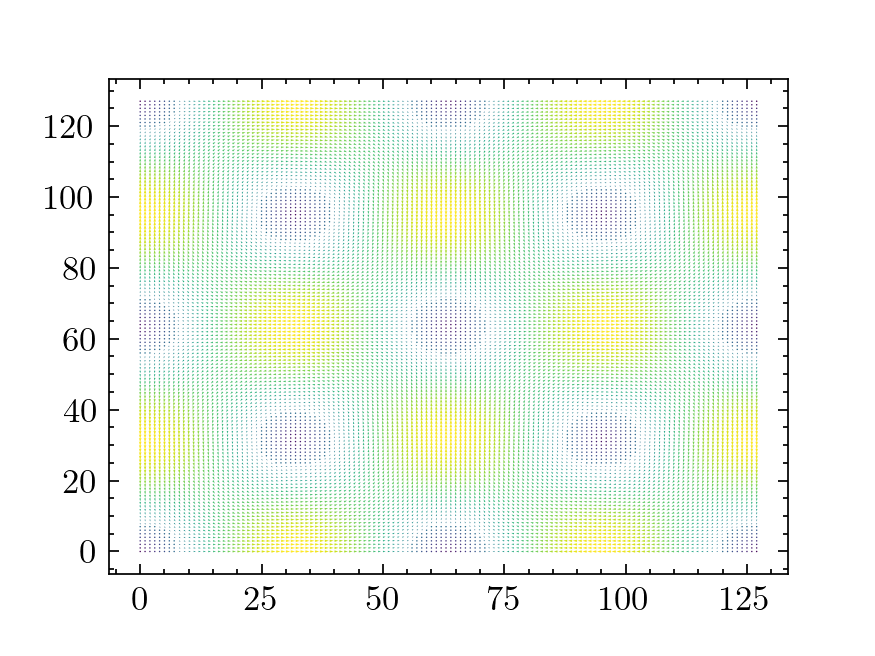

interactive(children=(FloatSlider(value=0.0, description='w', step=1.0), Output()), _dom_classes=('widget-inte…

In [44]:
fig, ax = plt.subplots(dpi=250)
ax.quiver(vel_x[0, ...], vel_y[0, ...], vel_norm[0, ...]);

def update(w=0): 
    ax.clear()
    w = int(w)
    ax.quiver(vel_x[w, ...], vel_y[w, ...], vel_norm[w, ...]);
    plt.show()

interact(update, w=widgets.FloatSlider(value=0, min=0, max=iters, step=1));